<a href="https://colab.research.google.com/github/mkesari-data/ml/blob/main/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross Validation
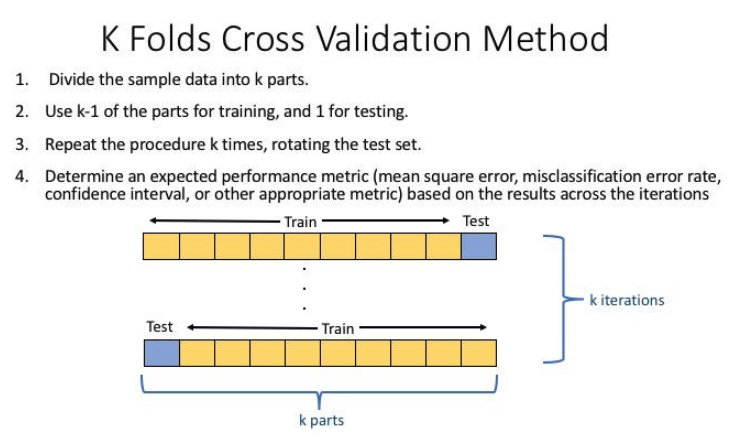



# About Cross Validation:-

---


In typical machine learning model training, the input data is usually divided into two segments: 70% for training the model and 30% for testing it.
**it's important to consider that the 30% of data reserved for testing, which is not utilized in training, might contain valuable insights that could enhance the model's training**.

Is there a method to leverage this 30% for training as well?
This is where the concept of **cross-validation** becomes beneficial.

**Cross-validation** allows for the use of the entire dataset for both training and testing, ensuring that every data point contributes to training the model, thereby maximizing the learning potential from the available data.



---



## Lets take an example :

**Iteration 1:**

Training: First 4 data sets (sets 1-4)
Validation: 5th data set

**Iteration 2:**

Training: Data sets 1-3 and 5
Validation: 4th data set

**Iteration 3:**

Training: Data sets 1, 2, 4, and 5
Validation: 3rd data set

**Iteration 4 and 5:**

Training: Four data sets are used (specific sets not specified)
Validation: The remaining data set is used

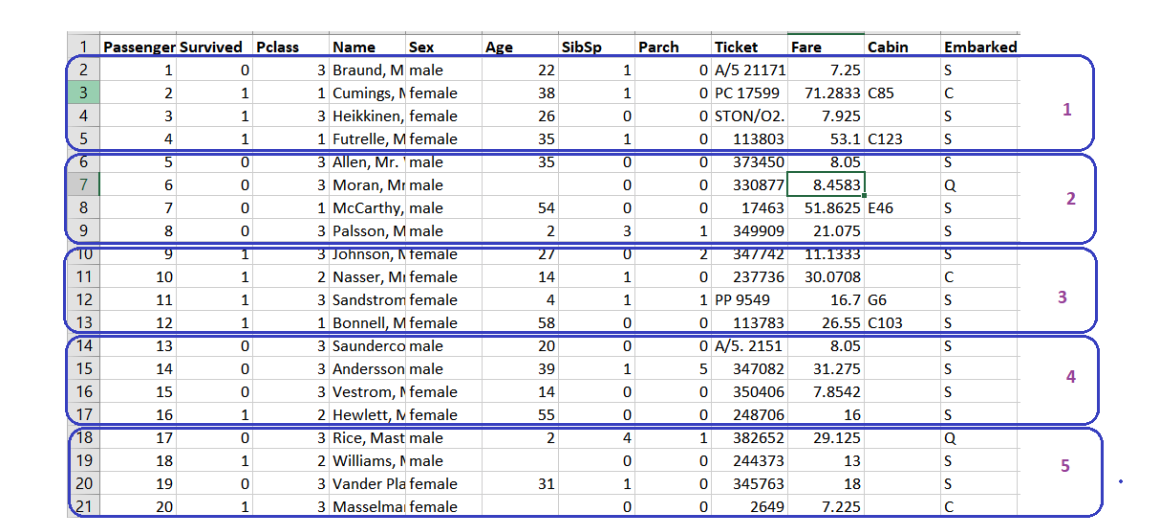

# Load TitanicDataset and apply DecisionTreeClassifer to appy CrossValidation

In [1]:
# mount doogle drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

#load dataset
import pandas as pd
dataset_path = '/content/drive/My Drive/datasets/decisiontree/titanic.csv'
titanic_dataset = pd.read_csv(dataset_path)
titanic_dataset.head()

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Our primary goal is to explain about CrossValidation. So applying minimal prepprocessing and ignoring EDA etc.  

In [2]:
# identify missing columns.
# if it is numerical replace with mean and if it categirical replace with mode.
import numpy as np

column_names = titanic_dataset.columns
value_missing_columns = {}

for column_name in column_names:
    null_values_count = titanic_dataset[column_name].isnull().sum()
    if null_values_count > 0:
        if titanic_dataset[column_name].dtype == 'object':
            # Fill missing values with the most common value (mode)
            mode_value = titanic_dataset[column_name].mode()[0]
            titanic_dataset[column_name].fillna(mode_value, inplace=True)
        elif np.issubdtype(titanic_dataset[column_name].dtype, np.number):
            # Fill missing values with the mean for numeric columns
            mean_value = titanic_dataset[column_name].mean()
            titanic_dataset[column_name].fillna(mean_value, inplace=True)

        value_missing_columns[column_name] = null_values_count

titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Convert categorical to Numerical

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

## iterate all columns , if datatype is string then convert to numerical using LabelEncoder

column_names = titanic_dataset.columns
for column_name in column_names:
  if(titanic_dataset[column_name].dtype == 'object'):
    titanic_dataset[column_name] = le.fit_transform(titanic_dataset[column_name])

# Train model using DecisionTree and use CrossValidaiton technique

### Prior to jump into the Cross-Validation technique, it's essential to grasp the various types of cross-validation methods available.

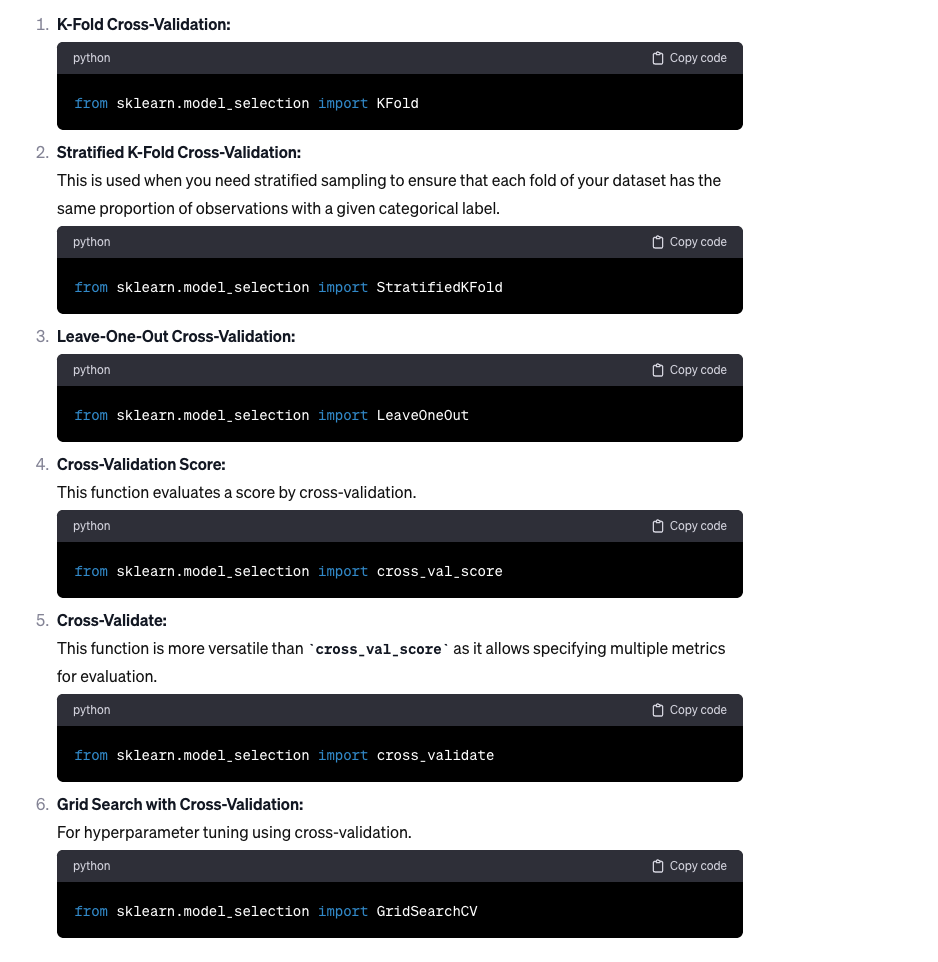

### We are going to explore `cross_validate`

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  cross_val_score , train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

X = titanic_dataset.drop('Survived' , axis=1)
y = titanic_dataset['Survived']

X_train , Y_test , X_train_result , Y_test_res = train_test_split(X , y , test_size=0.2)

dtc = DecisionTreeClassifier()

validation_scores = cross_val_score (estimator=dtc , X= X_train , y=X_train_result , cv =5)

print(validation_scores)


[0.77622378 0.77622378 0.6971831  0.77464789 0.81690141]


# GridSearchCV

GridSearchCV automates the search for the best model settings (**hyperparameters**).
It tests **different combinations of hyperparameter values and uses cross-validation to assess how well the model performs on various parts of the data**. It ultimately identifies the hyperparameter configuration that maximizes the model's performance.



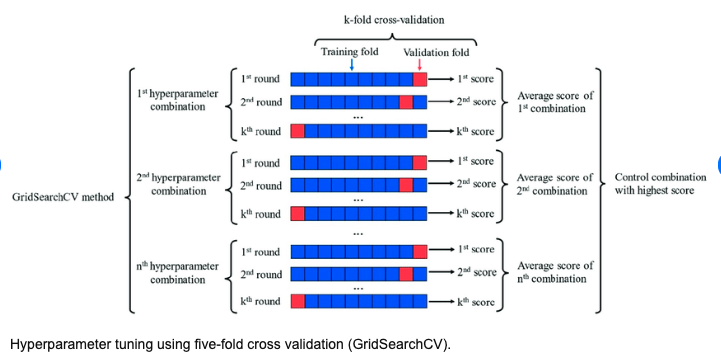

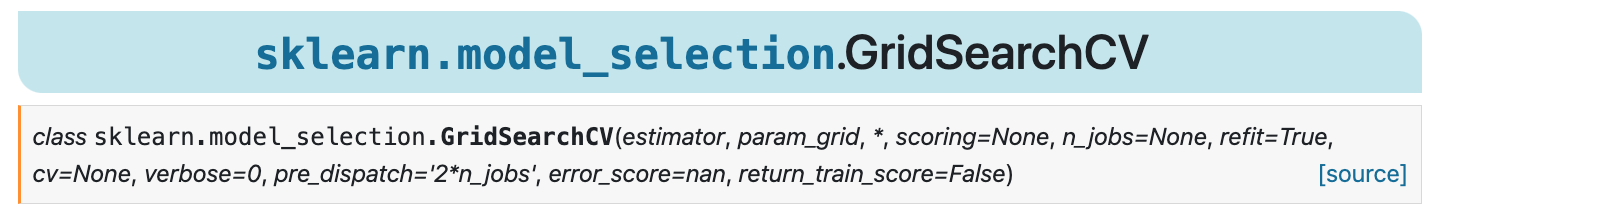

In [12]:
from sklearn.model_selection import GridSearchCV

dt_grid = { 'max_depth' : [ 3 , 4, 5, 6] ,'criterion' : ["gini", "entropy" ] }

grid_classifier  = GridSearchCV(estimator= dtc , param_grid=dt_grid , cv=5 , return_train_score=True )

grid_classifier_result = grid_classifier.fit(X_train , X_train_result)
cv_results = grid_classifier_result.cv_results_
print(cv_results.get('params'))
print(cv_results.get('mean_test_score'))
print(cv_results.get('mean_train_score'))
estimator = grid_classifier_result.best_estimator_
print(type(estimator))
print(estimator)

[{'criterion': 'gini', 'max_depth': 3}, {'criterion': 'gini', 'max_depth': 4}, {'criterion': 'gini', 'max_depth': 5}, {'criterion': 'gini', 'max_depth': 6}, {'criterion': 'entropy', 'max_depth': 3}, {'criterion': 'entropy', 'max_depth': 4}, {'criterion': 'entropy', 'max_depth': 5}, {'criterion': 'entropy', 'max_depth': 6}]
[0.80480646 0.79076135 0.80059096 0.79919236 0.80480646 0.7963853
 0.79068256 0.79635576]
[0.83567786 0.85217834 0.87851263 0.90344217 0.83567786 0.84866895
 0.86973391 0.89887584]
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier(max_depth=3)
